# Kickstarter Campaign Analysis

### Project objectives:
Kickstarter is an online crowdfunding platform aimed at helping people get their ideas funded while building a community of fans to support their ideas. While Kickstarter publishes many advice and best-practices articles on their blog, over half of campaigns still fail. 

**Why does this matter?** Well unlike their competitor, Indiegogo, Kickstarter campaign projects follow an "all or nothing" funding model. This means that if a Kickstarter campaign fails, both the project creators are disappointed, as well as the people who *did contribute* because the project will not be completed in any capacity.

**This project's objectives are the following:**
- Understand the marketplace of Kickstarter including timing of campaigns posted, types of projects, location of campaigns, description of campaigns and more
- Provide insight into attributes that set campaigns up for a higher rate of success to inform campaign creation in the future
- Build a predictive model that allows Kickstarter to identify high-failure-risk campaigns before they fail and provide supplemental advice and material to the creators

**Why data mining makes this problem approachable:** With over 4,700+ projects [live right now](https://www.kickstarter.com/help/stats?ref=2014datayir), it would be impossible for Kickstarter employees to monitor each campaign individually to support their success. Applying data mining to this problem allows Kickstarter to scale their support and outreach to their creator community with minimal, targeted work.

In [137]:
import pandas as pd
from pandas import Series, DataFrame
from scipy.stats import ttest_ind
%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
kickstarter = pd.read_csv("kickstarter_data_with_features.csv", index_col = 0)
kickstarter.head(1)

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,...,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch,launch_to_deadline,launch_to_state_change
0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,US,...,29,2014,22,12,17,2014,13,17 days 14:51:39.000000000,36 days 20:47:24.000000000,36 days 20:47:24.000000000


In [3]:
kickstarter.columns

Index([u'id', u'photo', u'name', u'blurb', u'goal', u'pledged', u'state',
       u'slug', u'disable_communication', u'country', u'currency',
       u'currency_symbol', u'currency_trailing_code', u'deadline',
       u'state_changed_at', u'created_at', u'launched_at', u'staff_pick',
       u'backers_count', u'static_usd_rate', u'usd_pledged', u'creator',
       u'location', u'category', u'profile', u'spotlight', u'urls',
       u'source_url', u'friends', u'is_starred', u'is_backing', u'permissions',
       u'name_len', u'name_len_clean', u'blurb_len', u'blurb_len_clean',
       u'deadline_weekday', u'state_changed_at_weekday', u'created_at_weekday',
       u'launched_at_weekday', u'deadline_month', u'deadline_day',
       u'deadline_yr', u'deadline_hr', u'state_changed_at_month',
       u'state_changed_at_day', u'state_changed_at_yr', u'state_changed_at_hr',
       u'created_at_month', u'created_at_day', u'created_at_yr',
       u'created_at_hr', u'launched_at_month', u'launched_at_day',

### Dataset background
This data comes from [Web Robots](https://webrobots.io/kickstarter-datasets/) and their data crawl as of February 1st 2017. Important attributes are described below:

- **Project:** a finite work with a clear goal that you’d like to bring to life (aka campaign)
- **Funding goal:** amount of money that a creator needs to complete their project
- **Name:** name of project on Kickstarter
- **Blurb:** the short description displayed under the name of your project and on the browse page
- **Pledged and backers:** amount of money that a project has raised and people that have supported it at the point of the API pull
- **State:** successful, failed, cancelled, live or suspended
- **Deadline, state changed, created at, launched at:** deadline given for successful funding, state changed when campaign went to success or failure, time the project was created at, time the project was launched at
- **Other attributes in this dataset:** country, currency, category

In [4]:
print "This dataset has information on ", len(kickstarter)," project campaigns."

This dataset has information on  20632  project campaigns.


### Summarizing and exploring the data

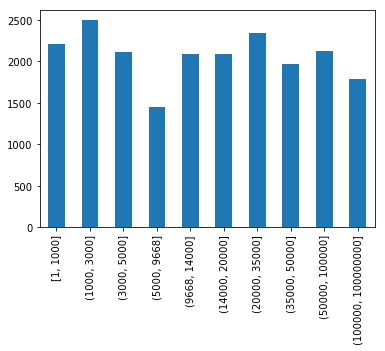

In [5]:
pd.qcut(kickstarter['goal'], 10).value_counts().sort_index().plot(kind='bar')

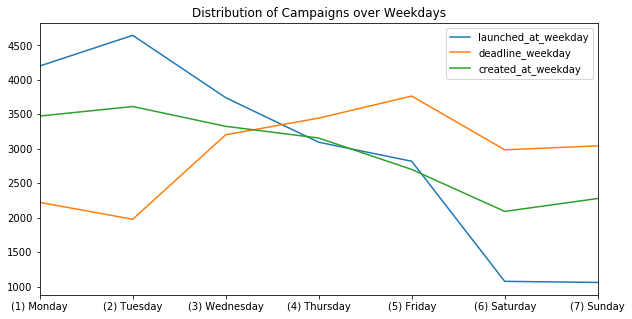

In [77]:
plot_df = pd.concat([kickstarter['launched_at_weekday'].value_counts(),
                     kickstarter['deadline_weekday'].value_counts(),
                    kickstarter['created_at_weekday'].value_counts()], axis=1)
plot_df.index = ["(5) Friday","(1) Monday","(6) Saturday","(7) Sunday","(4) Thursday","(2) Tuesday","(3) Wednesday"]
plot_df = plot_df.sort_index()
plot_df.plot(kind='line', figsize=(10,5), title = "Distribution of Campaigns over Weekdays")

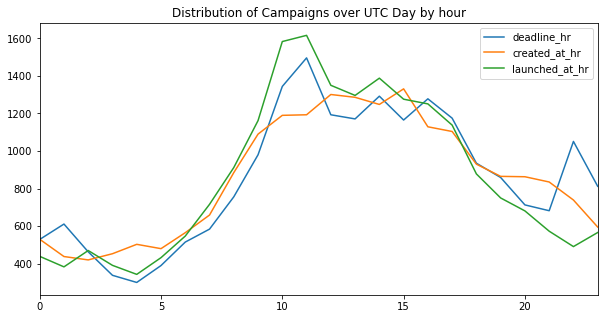

In [82]:
plot_df = pd.concat([kickstarter['deadline_hr'].value_counts(),
                     kickstarter['created_at_hr'].value_counts(),
                    kickstarter['launched_at_hr'].value_counts()], axis=1)
plot_df = plot_df.sort_index()
plot_df.plot(kind='line', figsize=(10,5), title = "Distribution of Campaigns over UTC Day by hour")

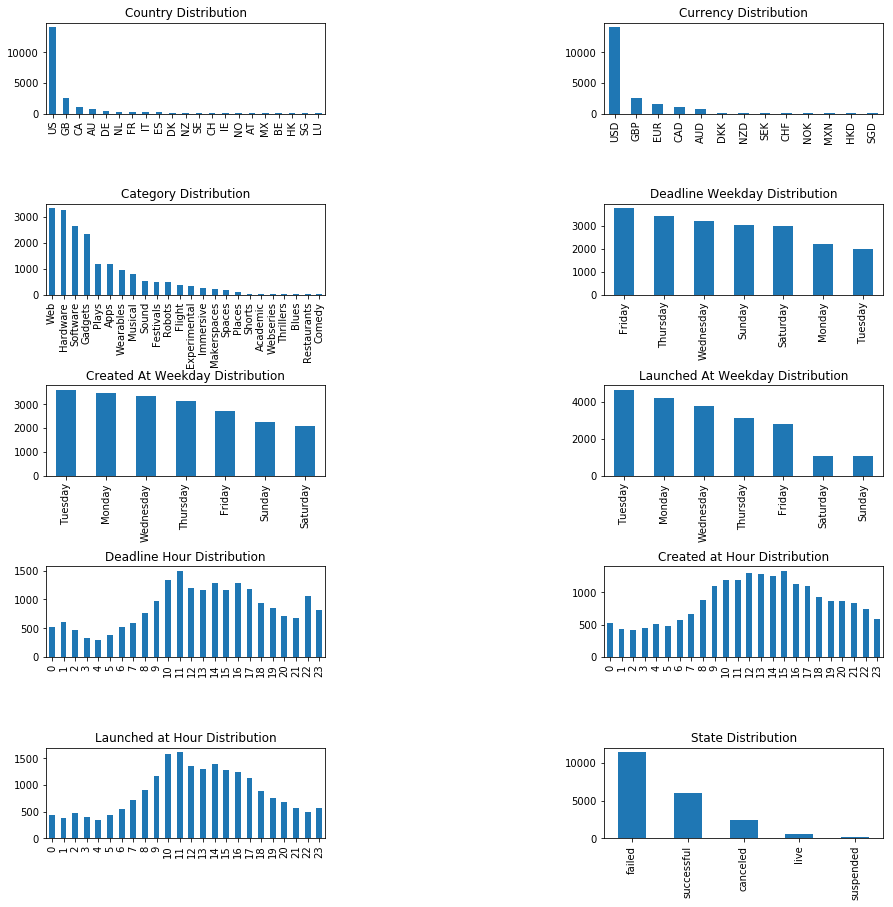

In [6]:
fig, axes = plt.subplots(nrows=5, ncols=2)
fig.subplots_adjust(hspace=1, wspace = 1)

kickstarter['country'].value_counts().plot(kind = 'bar',ax=axes[0,0], title = 'Country Distribution', figsize=(15,15))
kickstarter['currency'].value_counts().plot(kind = 'bar',ax=axes[0,1], title = 'Currency Distribution', figsize=(15,15))
kickstarter['category'].value_counts().plot(kind = 'bar',ax=axes[1,0], title = 'Category Distribution', figsize=(15,15))
kickstarter['deadline_weekday'].value_counts().plot(kind = 'bar',ax=axes[1,1], title = 'Deadline Weekday Distribution', figsize=(15,15))
kickstarter['created_at_weekday'].value_counts().plot(kind = 'bar',ax=axes[2,0], title = 'Created At Weekday Distribution', figsize=(15,15))
kickstarter['launched_at_weekday'].value_counts().plot(kind = 'bar',ax=axes[2,1], title = 'Launched At Weekday Distribution', figsize=(15,15))
kickstarter['deadline_hr'].value_counts().sort_index().plot(kind = 'bar',ax=axes[3,0], title = 'Deadline Hour Distribution', figsize=(15,15))
kickstarter['created_at_hr'].value_counts().sort_index().plot(kind = 'bar',ax=axes[3,1], title = 'Created at Hour Distribution', figsize=(15,15))
kickstarter['launched_at_hr'].value_counts().sort_index().plot(kind = 'bar',ax=axes[4,0], title = 'Launched at Hour Distribution', figsize=(15,15))
kickstarter['state'].value_counts().plot(kind = 'bar',ax=axes[4,1], title = 'State Distribution', figsize=(15,15))

In [7]:
def extract_days(val):
    try:
        l = val.split(" ")
        return int(l[0])
    except:
        return np.nan

kickstarter['create_to_launch_days'] = kickstarter['create_to_launch'].map(extract_days)
kickstarter['launch_to_deadline_days'] = kickstarter['launch_to_deadline'].map(extract_days)
kickstarter['launch_to_state_change_days'] = kickstarter['launch_to_state_change'].map(extract_days)
kickstarter.head(1)

,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,...,launched_at_month,launched_at_day,launched_at_yr,launched_at_hr,create_to_launch,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days
0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,US,...,12,17,2014,13,17 days 14:51:39.000000000,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36


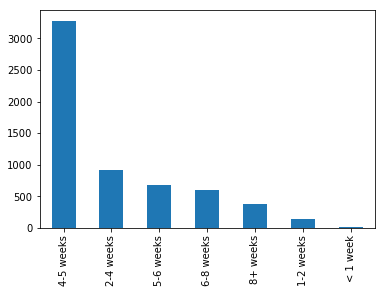

In [8]:
def return_week_bins(val):
    if val < 7:
        return "< 1 week"
    elif val < 14:
        return "1-2 weeks"
    elif val < 28:
        return "2-4 weeks"
    elif val < 35:
        return "4-5 weeks"
    elif val < 42:
        return "5-6 weeks"
    elif val < 56:
        return "6-8 weeks"
    else:
        return "8+ weeks"

successful_state_series = kickstarter[kickstarter['state'] == "successful"]['launch_to_deadline_days']
successful_state_series.map(return_week_bins).value_counts().plot(kind='bar')

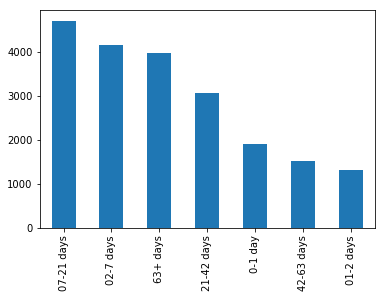

In [102]:
def return_date_bins(val):
    if val < 1:
        return "0-1 day"
    elif val < 2:
        return "01-2 days"
    elif val < 7:
        return "02-7 days"
    elif val < 21:
        return "07-21 days"
    elif val < 42:
        return "21-42 days"
    elif val < 63:
        return "42-63 days"
    else:
        return "63+ days"

create_launch_series = kickstarter['create_to_launch_days']
create_launch_series.map(return_date_bins).value_counts().plot(kind='bar')

### Comparing successful, failed and cancelled campaigns

In [95]:
successful_kickstarter = kickstarter[kickstarter['state'] == "successful"]
failed_kickstarter = kickstarter[kickstarter['state'] == "failed"]
cancelled_kickstarter = kickstarter[kickstarter['state'] == "canceled"]
print len(successful_kickstarter)," successful campaigns"
print len(failed_kickstarter)," failed campaigns"
print len(cancelled_kickstarter)," cancelled campaigns"

6018  successful campaigns
11416  failed campaigns
2460  cancelled campaigns


Ttest_indResult(statistic=-23.89143185365478, pvalue=3.700264514714505e-124)
Failed mean:  4.88262088297
Successful mean:  5.79378531073


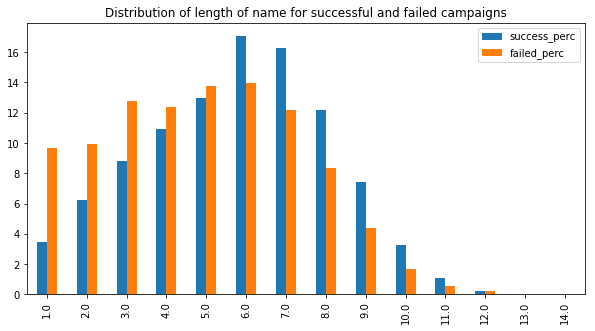

In [96]:
n = 'name_len_clean'
compare_name_len_clean = pd.concat([kickstarter[n].value_counts(),successful_kickstarter[n].value_counts(),failed_kickstarter[n].value_counts(),cancelled_kickstarter[n].value_counts()], axis=1)
compare_name_len_clean.columns = ['all','successful','failed','cancelled']
compare_name_len_clean.loc['total'] = compare_name_len_clean.sum(axis=0)

def get_perc(val, col):
    return (val / compare_name_len_clean[col]['total'])*100

compare_name_len_clean['all_perc'] = compare_name_len_clean['all'].apply(get_perc, args=('all',))
compare_name_len_clean['success_perc'] = compare_name_len_clean['successful'].apply(get_perc, args=('successful',))
compare_name_len_clean['failed_perc'] = compare_name_len_clean['failed'].apply(get_perc, args=('failed',))
compare_name_len_clean['cancelled_perc'] = compare_name_len_clean['cancelled'].apply(get_perc, args=('cancelled',))

compare_name_len_clean[['success_perc','failed_perc']][:14].sort_index().plot(kind='bar', figsize=(10,5), title = "Distribution of length of name for successful and failed campaigns")

print ttest_ind(failed_kickstarter[n], successful_kickstarter[n])
print "Failed mean: ", failed_kickstarter[n].mean()
print "Successful mean: ", successful_kickstarter[n].mean()


In [97]:
print failed_kickstarter['name_len_clean'].value_counts().sum()
print successful_kickstarter['name_len_clean'].value_counts().sum()

11416
6018


Ttest_indResult(statistic=-7.934594998564541, pvalue=2.2390567408462201e-15)
Failed mean:  12.9865101612
Successful mean:  13.3911598538


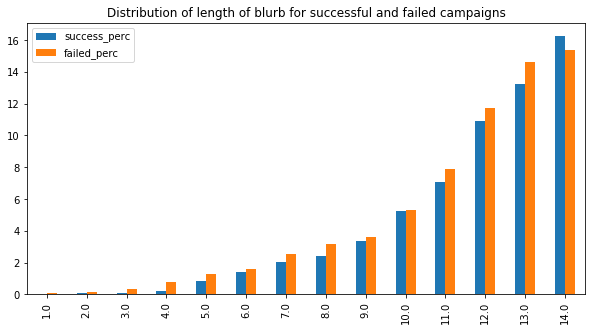

In [98]:
n = 'blurb_len_clean'
compare_blurb_len_clean = pd.concat([kickstarter[n].value_counts(),successful_kickstarter[n].value_counts(),failed_kickstarter[n].value_counts(),cancelled_kickstarter[n].value_counts()], axis=1)
compare_blurb_len_clean.columns = ['all','successful','failed','cancelled']
compare_blurb_len_clean.loc['total'] = compare_blurb_len_clean.sum(axis=0)

def get_perc(val, col):
    return (val / compare_blurb_len_clean[col]['total'])*100

compare_blurb_len_clean['all_perc'] = compare_blurb_len_clean['all'].apply(get_perc, args=('all',))
compare_blurb_len_clean['success_perc'] = compare_blurb_len_clean['successful'].apply(get_perc, args=('successful',))
compare_blurb_len_clean['failed_perc'] = compare_blurb_len_clean['failed'].apply(get_perc, args=('failed',))
compare_blurb_len_clean['cancelled_perc'] = compare_blurb_len_clean['cancelled'].apply(get_perc, args=('cancelled',))

compare_blurb_len_clean[['success_perc','failed_perc']][:14].sort_index().plot(kind='bar',figsize=(10,5), title = "Distribution of length of blurb for successful and failed campaigns")

print ttest_ind(failed_kickstarter[n], successful_kickstarter[n])
print "Failed mean: ", failed_kickstarter[n].mean()
print "Successful mean: ", successful_kickstarter[n].mean()

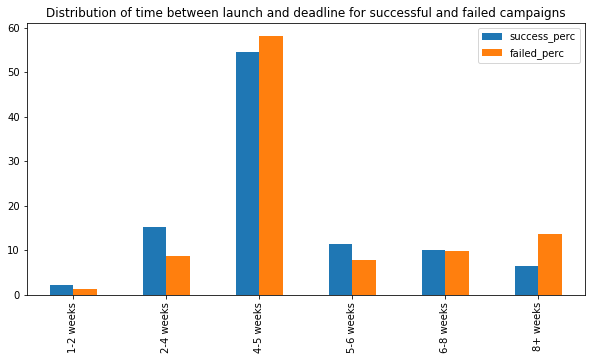

In [99]:
n = 'launch_to_deadline_days'
compare_L2D = pd.concat([kickstarter[n].apply(return_week_bins).value_counts(),successful_kickstarter[n].apply(return_week_bins).value_counts(),failed_kickstarter[n].apply(return_week_bins).value_counts(),cancelled_kickstarter[n].apply(return_week_bins).value_counts()], axis=1)
compare_L2D.columns = ['all','successful','failed','cancelled']
compare_L2D.loc['total'] = compare_L2D.sum(axis=0)

def get_perc(val, col):
    return (float(val) / float(compare_L2D[col]['total']))*100

compare_L2D['all_perc'] = compare_L2D['all'].apply(get_perc, args=('all',))
compare_L2D['success_perc'] = compare_L2D['successful'].apply(get_perc, args=('successful',))
compare_L2D['failed_perc'] = compare_L2D['failed'].apply(get_perc, args=('failed',))
compare_L2D['cancelled_perc'] = compare_L2D['cancelled'].apply(get_perc, args=('cancelled',))

compare_L2D[['success_perc','failed_perc']][:6].sort_index().plot(kind='bar', figsize=(10,5), title = "Distribution of time between launch and deadline for successful and failed campaigns")

Ttest_indResult(statistic=2.2280543992164743, pvalue=0.025889595536363275)
Successful:  19.0
Failed:  12.0


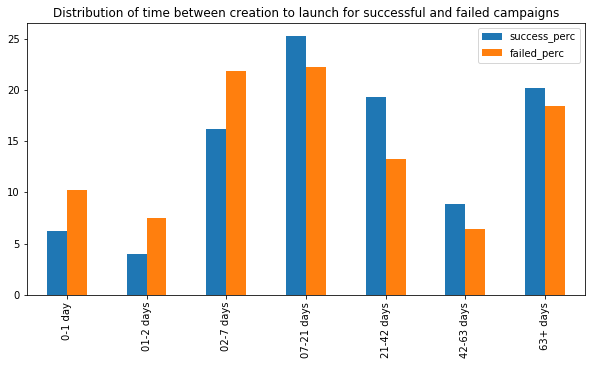

In [105]:
n = 'create_to_launch_days'
compare_C2L = pd.concat([kickstarter[n].apply(return_date_bins).value_counts(),successful_kickstarter[n].apply(return_date_bins).value_counts(),failed_kickstarter[n].apply(return_date_bins).value_counts(),cancelled_kickstarter[n].apply(return_date_bins).value_counts()], axis=1)
compare_C2L.columns = ['all','successful','failed','cancelled']
compare_C2L.loc['total'] = compare_C2L.sum(axis=0)

compare_C2L['all_perc'] = compare_C2L['all'].apply(get_perc, args=('all',))
compare_C2L['success_perc'] = compare_C2L['successful'].apply(get_perc, args=('successful',))
compare_C2L['failed_perc'] = compare_C2L['failed'].apply(get_perc, args=('failed',))
compare_C2L['cancelled_perc'] = compare_C2L['cancelled'].apply(get_perc, args=('cancelled',))

print ttest_ind(successful_kickstarter[n],failed_kickstarter[n])
print "Successful: ", successful_kickstarter[n].median()
print "Failed: ", failed_kickstarter[n].median()

compare_C2L[['success_perc','failed_perc']][:7].sort_index().plot(kind='bar', figsize=(10,5), title = "Distribution of time between creation to launch for successful and failed campaigns")

In [101]:
# Are campaigns that have longer than 1 week between creation and launch more likely to be successful?
compare_C2L

,all,successful,failed,cancelled,all_perc,success_perc,failed_perc,cancelled_perc
0-1 day,1905,374,1171,273,9.233230,6.214689,10.257533,11.097561
1-2 days,1324,240,861,153,6.417216,3.988036,7.542046,6.219512
2-7 days,4145,976,2496,522,20.090151,16.218013,21.864050,21.219512
21-42 days,3075,1164,1510,320,14.904033,19.341974,13.227050,13.008130
42-63 days,1512,533,738,179,7.328422,8.856763,6.464611,7.276423
63+ days,3967,1212,2103,515,19.227414,20.139581,18.421514,20.934959
7-21 days,4704,1519,2537,498,22.799535,25.240944,22.223196,20.243902
total,20632,6018,11416,2460,100.000000,100.000000,100.000000,100.000000


Odds Ratio: 
- Number of successful campaigns with C2L less than 1 week: 1590
- Number of successful campaigns with C2L greater than 1 week: 4428
- Number of failed campaigns with C2L less than 1 week: 4528
- Number of failed campaigns with C2L greater than 1 week: 6888
Odds Ratio: 1.83 times more likely to be successful if the C2L days is greater than 1 week

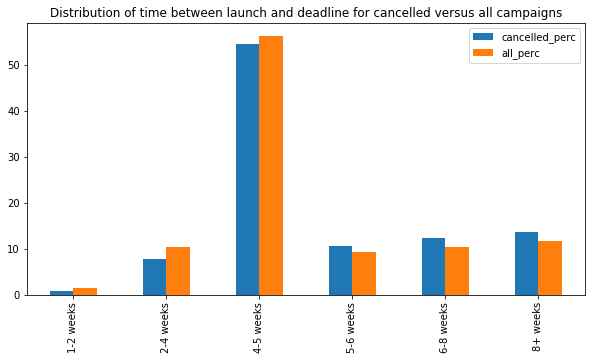

In [23]:
compare_L2D[['cancelled_perc','all_perc']][:6].sort_index().plot(kind='bar', figsize=(10,5), title = "Distribution of time between launch and deadline for cancelled versus all campaigns")

### How do the goals vary based on successful, failed or cancelled campaigns?

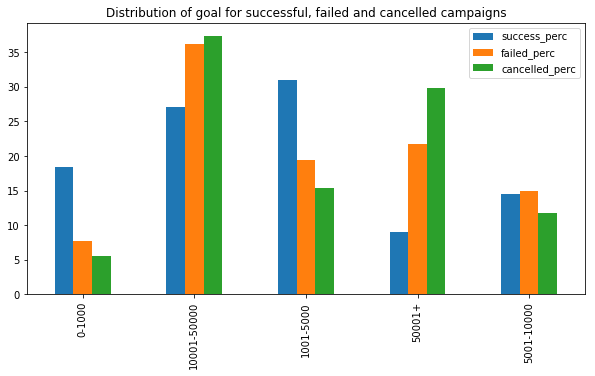

In [24]:
def get_goal_buckets(val):
    if val < 1001:
        return "0-1000"
    elif val < 5001:
        return "1001-5000"
    elif val < 10001:
        return "5001-10000"
    elif val < 50001:
        return "10001-50000"
    else:
        return "50001+"

n = 'goal'
compare_goal = pd.concat([kickstarter[n].apply(get_goal_buckets).value_counts(),successful_kickstarter[n].apply(get_goal_buckets).value_counts(),failed_kickstarter[n].apply(get_goal_buckets).value_counts(),cancelled_kickstarter[n].apply(get_goal_buckets).value_counts()], axis=1)
compare_goal.columns = ['all','successful','failed','cancelled']
compare_goal.loc['total'] = compare_goal.sum(axis=0)

compare_goal['all_perc'] = compare_goal['all'].apply(get_perc, args=('all',))
compare_goal['success_perc'] = compare_goal['successful'].apply(get_perc, args=('successful',))
compare_goal['failed_perc'] = compare_goal['failed'].apply(get_perc, args=('failed',))
compare_goal['cancelled_perc'] = compare_goal['cancelled'].apply(get_perc, args=('cancelled',))

compare_goal[['success_perc','failed_perc','cancelled_perc']][:5].sort_index().plot(kind='bar', figsize=(10,5), title = "Distribution of goal for successful, failed and cancelled campaigns")

In [107]:
# What failure rate does a goal above 50K have?

print "Number of successful kickstarters with goal over 50k:", len(successful_kickstarter[successful_kickstarter['goal'] >= 50000])
print "Number of successful kickstarters with goal under 50k:", len(successful_kickstarter[successful_kickstarter['goal'] < 50000])
print "Number of failed kickstarters with goal over 50k:", len(failed_kickstarter[failed_kickstarter['goal'] >= 50000])
print "Number of failed kickstarters with goal over 50k:", len(failed_kickstarter[failed_kickstarter['goal'] < 50000])

print "Success mean:", successful_kickstarter['goal'].median()
print "Failed mean:", failed_kickstarter['goal'].median()

Number of successful kickstarters with goal over 50k: 847
Number of successful kickstarters with goal under 50k: 5171
Number of failed kickstarters with goal over 50k: 3218
Number of failed kickstarters with goal over 50k: 8198
Success mean: 5750.0
Failed mean: 16940.5


### Are there statistically significant differences between successful campaigns and failed campaigns?

In [26]:
from scipy.stats import ttest_ind

print ttest_ind(successful_kickstarter['name_len_clean'], failed_kickstarter['name_len_clean'])
print ttest_ind(successful_kickstarter['blurb_len_clean'], failed_kickstarter['blurb_len_clean'])
print ttest_ind(failed_kickstarter['launch_to_deadline_days'], successful_kickstarter['launch_to_deadline_days'])
print ttest_ind(successful_kickstarter['create_to_launch_days'], failed_kickstarter['create_to_launch_days'])
print ttest_ind(failed_kickstarter['goal'], successful_kickstarter['goal'])

print "Failed kickstarter average goal", failed_kickstarter['goal'].mean()
print "Successful kickstarter average goal", successful_kickstarter['goal'].mean()

Ttest_indResult(statistic=23.89143185365478, pvalue=3.700264514714505e-124)
Ttest_indResult(statistic=7.934594998564541, pvalue=2.2390567408462201e-15)
Ttest_indResult(statistic=14.396640339154567, pvalue=1.00689346549693e-46)
Ttest_indResult(statistic=2.2280543992164743, pvalue=0.025889595536363275)
Ttest_indResult(statistic=4.644631902126469, pvalue=3.4317141020142609e-06)
122643.423843
21173.2061599


As you can see, using a p-value of <.001, the differences in sample distribution for successful and failed campaigns are *statistically significant* for "name length cleaned", "blurb length cleaned", "launch to deadline days" and "goal", but not for "create to launch days".

# Weekday versus success rates

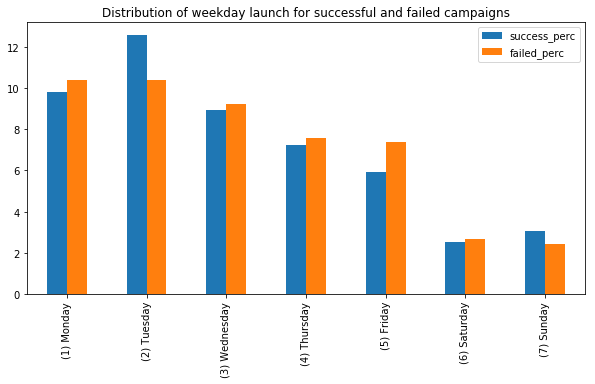

In [118]:
# Launched weekday distribution by state
compare_launched_df = pd.concat([successful_kickstarter['launched_at_weekday'].value_counts(), failed_kickstarter['launched_at_weekday'].value_counts()], axis=1)
compare_launched_df.columns = ['successful','failed']
compare_L2D.loc['total'] = compare_C2L.sum(axis=0)

compare_launched_df['success_perc'] = compare_launched_df['successful'].apply(get_perc, args=('successful',))
compare_launched_df['failed_perc'] = compare_launched_df['failed'].apply(get_perc, args=('failed',))
compare_launched_df.index = ["(5) Friday","(1) Monday","(6) Saturday","(7) Sunday","(4) Thursday","(2) Tuesday","(3) Wednesday"]
compare_launched_df = compare_launched_df.sort_index()

compare_launched_df[['success_perc','failed_perc']].plot(kind='bar', figsize=(10,5), title = "Distribution of weekday launch for successful and failed campaigns")

In [117]:
# How much likely are campaigns launched on a Tuesday to be successful than average?
print compare_launched_df

           successful  failed  success_perc  failed_perc
Friday            714    1684      5.932203     7.375613
Monday           1178    2365      9.787305    10.358269
Saturday          303     607      2.517448     2.658549
Sunday            367     555      3.049186     2.430799
Thursday          868    1728      7.211698     7.568325
Tuesday          1511    2371     12.554005    10.384548
Wednesday        1077    2106      8.948156     9.223896


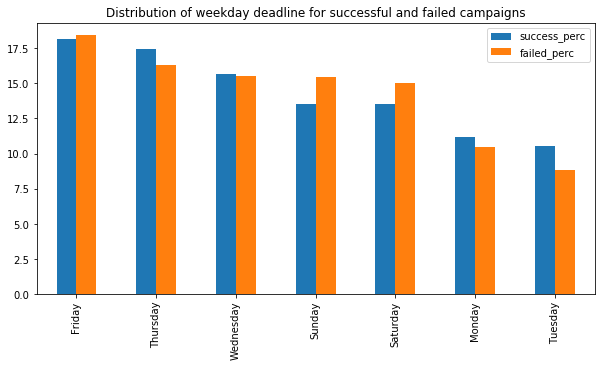

In [279]:
# Deadline weekday distribution by state
compare_deadline_df = pd.concat([successful_kickstarter['deadline_weekday'].value_counts(), failed_kickstarter['deadline_weekday'].value_counts()], axis=1)
compare_deadline_df.columns = ['successful','failed']
compare_L2D.loc['total'] = compare_C2L.sum(axis=0)

compare_deadline_df['success_perc'] = compare_deadline_df['successful'].apply(get_perc, args=('successful',))
compare_deadline_df['failed_perc'] = compare_deadline_df['failed'].apply(get_perc, args=('failed',))

compare_deadline_df[['success_perc','failed_perc']].plot(kind='bar', figsize=(10,5), title = "Distribution of weekday deadline for successful and failed campaigns")

We can see that campaigns are more likely to be successful if they are launched on a Tuesday. And are more likely to fail if they have a deadline on a weekend. So, we will create new boolean variables for LaunchedTuesday and DeadlineWeekend.

In [228]:
def launched_tues(val):
    if val == "Tuesday":
        return 1
    else:
        return 0
    
kickstarter['LaunchedTuesday'] = kickstarter['launched_at_weekday'].apply(launched_tues)

def deadline_weekend(val):
    if val == "Saturday":
        return 1
    elif val == "Sunday":
        return 1
    else:
        return 0
    
kickstarter['DeadlineWeekend'] = kickstarter['deadline_weekday'].apply(deadline_weekend)

### Let's explore the categories of Kickstarter campaigns further.

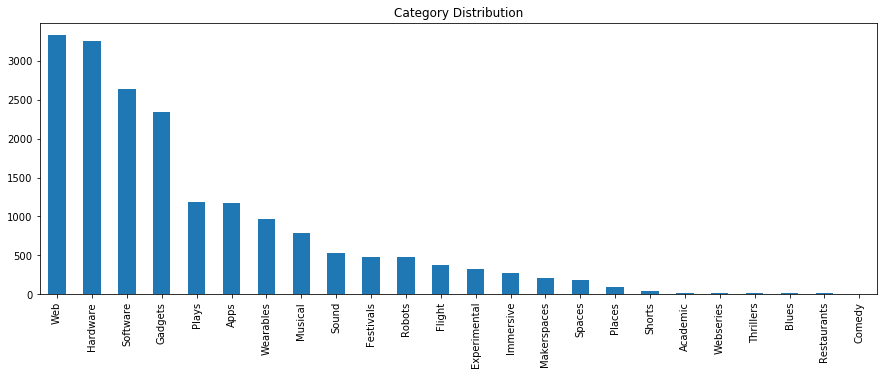

In [133]:
kickstarter['category'].value_counts().plot(kind = 'bar',title = 'Category Distribution', figsize=(15,5))

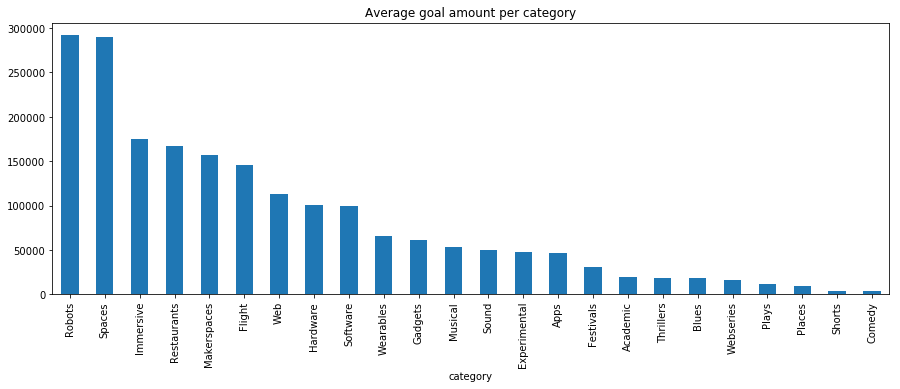

In [179]:
# What is the average goal amount per category?
kickstarter_cat_goal = kickstarter.groupby(['category'])[['goal']].mean()
kickstarter_cat_goal = kickstarter_cat_goal.unstack()
kickstarter_cat_goal['goal'].sort_values(ascending=False).plot(kind='bar', figsize=(15,5), title = "Average goal amount per category")

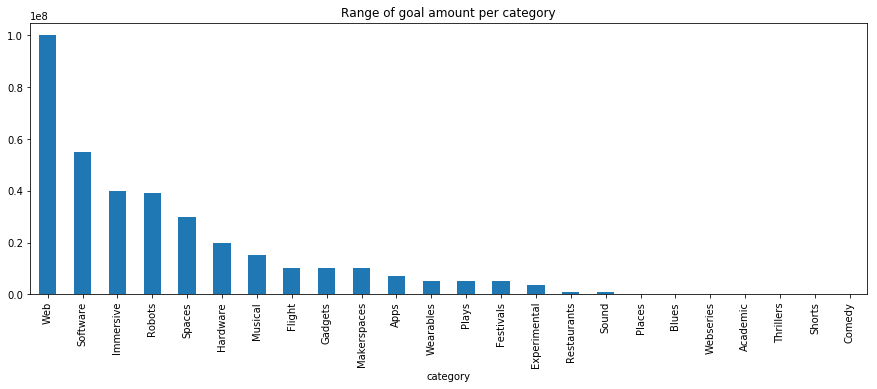

In [44]:
# What is the range of goal amount per category?
kickstarter_cat_goal_2 = kickstarter.groupby(['category'])[['goal']].agg([min,max])
kickstarter_cat_goal_2 = kickstarter_cat_goal_2['goal']
kickstarter_cat_goal_2['range'] = kickstarter_cat_goal_2['max'] - kickstarter_cat_goal_2['min']
kickstarter_cat_goal_2['range'].sort_values(ascending=False).plot(kind='bar', figsize=(15,5), title = "Range of goal amount per category")

**NOTE:** skewed by categories with low volume.

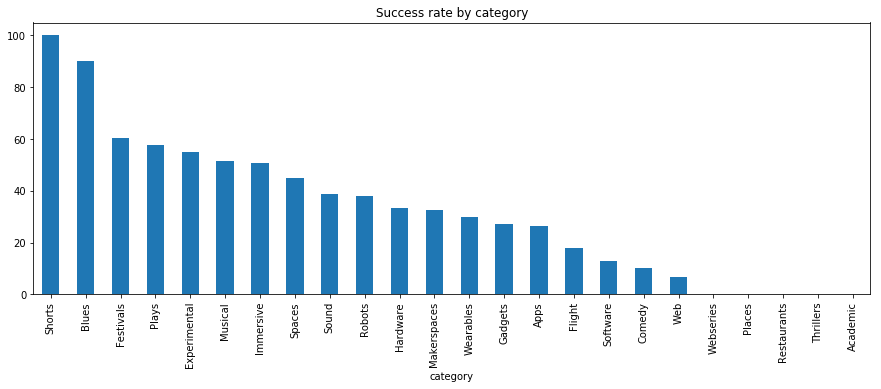

In [180]:
# Which categories are most likely to be successful? (% success rate by category)
kickstarter_cat_succ = kickstarter.groupby(['category','state'])[['state']].count()
kickstarter_cat_succ = kickstarter_cat_succ.unstack()
kickstarter_cat_succ = kickstarter_cat_succ['state']
kickstarter_cat_succ = kickstarter_cat_succ.fillna(0)

def calc_perc_success(row):
    success_num = row['successful']
    total = row.sum()
    return float(success_num)/float(total)*100

kickstarter_cat_succ['perc_success'] = kickstarter_cat_succ.apply(calc_perc_success, axis=1)
kickstarter_cat_succ['perc_success'].sort_values(ascending=False).plot(kind = 'bar', figsize=(15,5), title = "Success rate by category")

### Let's try to translate the campaign goals into percentiles based on categories to normalize goals.

In [34]:
# try with web first

def get_percentile_of_distribution(val,maxval):
    return val/maxval*100
    
web_kickstarter = kickstarter[kickstarter['category'] == "Web"]
maxval = web_kickstarter['goal'].max()
web_kickstarter['goalPCTILE'] = kickstarter['goal'].apply(get_percentile_of_distribution, args=(maxval,))

pd.qcut(web_kickstarter['goal'],10).value_counts()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(5000, 10000]          547
(12000, 20000]         396
(3000, 5000]           392
[1, 1000]              350
(1000, 3000]           332
(50000, 100000]        324
(30000, 50000]         316
(20000, 30000]         313
(100000, 100000000]    303
(10000, 12000]          52
Name: goal, dtype: int64

## Exploring "staff pick" campaigns

In [131]:
kickstarter.groupby(['staff_pick','state'])[['state']].count()

state
staff_pick state            
False      canceled     2358
           failed      10996
           live          476
           successful   4387
           suspended     230
True       canceled      102
           failed        420
           live           32
           successful   1631

## How much money is lost from failed campaigns?

In [136]:
failed_kickstarter['pledged'].sum()

31707603.24000002

# Building a regression model

In [119]:
import statsmodels.api as sm
from patsy import dmatrices

def get_bool(state):
    if state == "successful":
        return 1
    else:
        return 0

kickstarter['SuccessfulBool'] = kickstarter['state'].apply(get_bool)

def get_TOPCOUNTRY(country):
    if country in ["US","GB","HK","MX","NZ"]:
        return 1
    else:
        return 0

kickstarter['TOPCOUNTRY'] = kickstarter['country'].apply(get_TOPCOUNTRY)

kickstarter['LaunchedTuesSun'] = 0
mask = (kickstarter['launched_at_weekday'] == "Tuesday") | (kickstarter['launched_at_weekday'] == "Sunday")
kickstarter.ix[mask, 'LaunchedTuesSun'] = 1

kickstarter.columns

Index([u'id', u'photo', u'name', u'blurb', u'goal', u'pledged', u'state',
       u'slug', u'disable_communication', u'country', u'currency',
       u'currency_symbol', u'currency_trailing_code', u'deadline',
       u'state_changed_at', u'created_at', u'launched_at', u'staff_pick',
       u'backers_count', u'static_usd_rate', u'usd_pledged', u'creator',
       u'location', u'category', u'profile', u'spotlight', u'urls',
       u'source_url', u'friends', u'is_starred', u'is_backing', u'permissions',
       u'name_len', u'name_len_clean', u'blurb_len', u'blurb_len_clean',
       u'deadline_weekday', u'state_changed_at_weekday', u'created_at_weekday',
       u'launched_at_weekday', u'deadline_month', u'deadline_day',
       u'deadline_yr', u'deadline_hr', u'state_changed_at_month',
       u'state_changed_at_day', u'state_changed_at_yr', u'state_changed_at_hr',
       u'created_at_month', u'created_at_day', u'created_at_yr',
       u'created_at_hr', u'launched_at_month', u'launched_at_day',

### Write design matrix to file for building models

In [120]:
kickstarter.to_csv("kickstarter_data_full.csv")

In [132]:
y, X = dmatrices('SuccessfulBool ~ name_len_clean + blurb_len_clean + launch_to_deadline_days + launch_to_state_change_days + TOPCOUNTRY + LaunchedTuesSun', data=kickstarter, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print result.summary()

                            OLS Regression Results                            
Dep. Variable:         SuccessfulBool   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     319.7
Date:                Sun, 23 Apr 2017   Prob (F-statistic):               0.00
Time:                        20:35:02   Log-Likelihood:                -12089.
No. Observations:               20627   AIC:                         2.419e+04
Df Residuals:                   20620   BIC:                         2.425e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept         

# Running K Nearest Neighbors

In [133]:
from sklearn.cross_validation import train_test_split
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Set up model
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors=15,
                                       weights='uniform',
                                       p=2)
# Fit the model
model.fit(X_train, y_train)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           n_neighbors=15, p=2, weights='uniform')

In [134]:
# Run model on entire training data to find training accuracy
from sklearn import metrics
prediction_on_training = model.predict(X_train)
print metrics.accuracy_score(y_train, prediction_on_training)

0.734104446599


In [135]:
# Run model on test data to find test accuracy
predicted_classes = model.predict(X_test)
print metrics.accuracy_score(y_test, predicted_classes)

0.691064792374


## Build a correlation matrix to help identify variables

In [126]:
corrdf = kickstarter.corr()
corrdf['SuccessfulBool'].sort_values()

launch_to_deadline_days       -0.112968
deadline_yr                   -0.086247
state_changed_at_yr           -0.082565
launched_at_yr                -0.080460
created_at_yr                 -0.078833
disable_communication         -0.068135
launched_at_hr                -0.054318
goal                          -0.035045
id                            -0.015477
deadline_day                  -0.011189
created_at_month              -0.008615
state_changed_at_day          -0.008285
launched_at_day               -0.008251
deadline_hr                   -0.001228
created_at_day                -0.000470
currency_trailing_code         0.005023
state_changed_at_hr            0.005708
created_at_hr                  0.008278
launched_at_month              0.010042
create_to_launch_days          0.012799
blurb_len                      0.021875
deadline_month                 0.025649
state_changed_at_month         0.029588
LaunchedTuesSun                0.051079
static_usd_rate                0.059260


# How much money did failed and cancelled Kickstarter campaigns lose by year?

In [139]:
print failed_kickstarter.groupby('deadline_yr')['usd_pledged'].sum()
print cancelled_kickstarter.groupby('deadline_yr')['usd_pledged'].sum()

deadline_yr
2009    2.833000e+03
2010    9.066894e+04
2011    2.142140e+05
2012    8.867063e+05
2013    4.283546e+06
2014    8.656167e+06
2015    8.933665e+06
2016    6.861435e+06
2017    5.731574e+05
Name: usd_pledged, dtype: float64
deadline_yr
2009    8.700000e+02
2010    6.332470e+03
2011    2.971601e+04
2012    1.981513e+05
2013    4.131700e+05
2014    2.819996e+06
2015    5.051406e+06
2016    4.553299e+06
2017    1.379968e+06
Name: usd_pledged, dtype: float64


11.4 million dollars were wasted last year (2016) from failed and cancelled Kickstarter campaigns

# What percentage of successful campaigns are "staff picks" vs failed/cancelled campagins?

In [144]:
print "Successful campaigns % staff picks"
print len(successful_kickstarter[successful_kickstarter['staff_pick'] == 1])/(float(len(successful_kickstarter))*100)
print len(successful_kickstarter[successful_kickstarter['staff_pick'] == 1])

print "Failed campaigns % staff picks"
print len(failed_kickstarter[failed_kickstarter['staff_pick'] == 1])/(float(len(failed_kickstarter))*100)
print len(failed_kickstarter[failed_kickstarter['staff_pick'] == 1])

Successful campaigns % staff picks
0.00271020272516
1631
Failed campaigns % staff picks
0.000367904695165
420
